In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pyms-diabete/diabete.csv


In [58]:
%matplotlib inline

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:
diabete = pd.read_csv("/kaggle/input/pyms-diabete/diabete.csv")

In [61]:
diabete.head().T

,0,1,2,3,4
n_pregnant,6.000,1.000,8.000,1.000,0.000
glucose,148.000,85.000,183.000,89.000,137.000
tension,72.000,66.000,64.000,66.000,40.000
thickness,35.000,29.000,0.000,23.000,35.000
insulin,0.000,0.000,0.000,94.000,168.000
bmi,33.600,26.600,23.300,28.100,43.100
pedigree,0.627,0.351,0.672,0.167,2.288
age,50.000,31.000,32.000,21.000,33.000
diabete,1.000,0.000,1.000,0.000,1.000


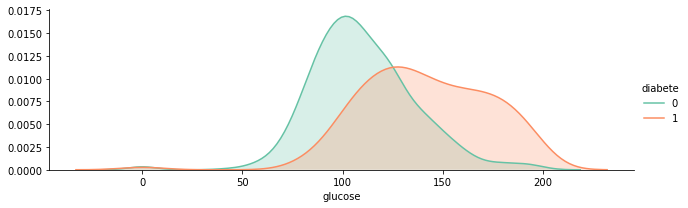

In [62]:
fig = sns.FacetGrid(diabete, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "glucose", shade=True)
fig.add_legend()

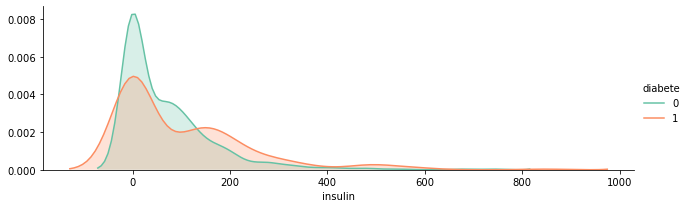

In [63]:
fig = sns.FacetGrid(diabete, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "insulin", shade=True)
fig.add_legend()

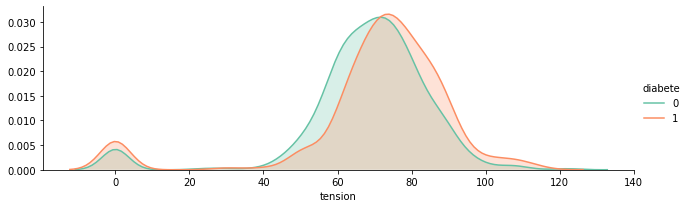

In [64]:
fig = sns.FacetGrid(diabete, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "tension", shade=True)
fig.add_legend()

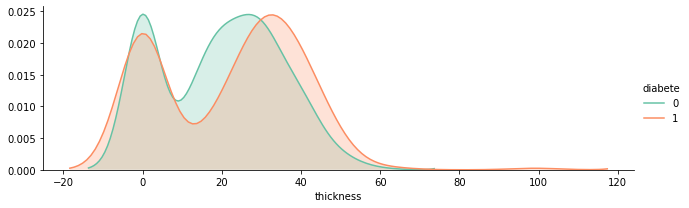

In [65]:
fig = sns.FacetGrid(diabete, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "thickness", shade=True)
fig.add_legend()

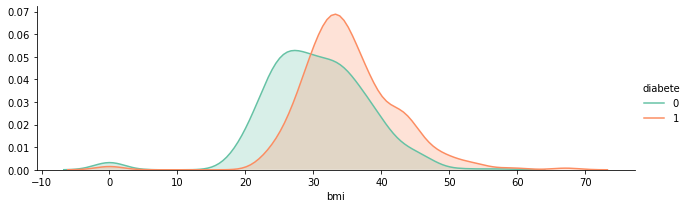

In [66]:
fig = sns.FacetGrid(diabete, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "bmi", shade=True)
fig.add_legend()

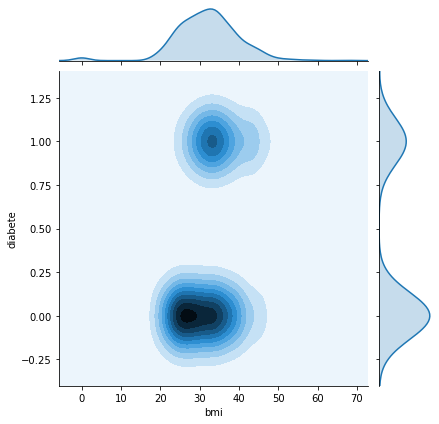

In [67]:
sns.jointplot("bmi","diabete",diabete,kind='kde')

Quelle colonnes sont à garder ?

In [68]:
diabete.columns

Index(['n_pregnant', 'glucose', 'tension', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age', 'diabete'],
      dtype='object')

In [69]:
diabete.count()

n_pregnant    768
glucose       768
tension       768
thickness     768
insulin       768
bmi           768
pedigree      768
age           768
diabete       768
dtype: int64

Tout est rempli


### Déséquilibre des distributions

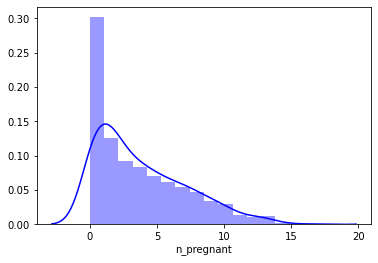

In [70]:
sns.distplot(diabete.n_pregnant, color='blue')

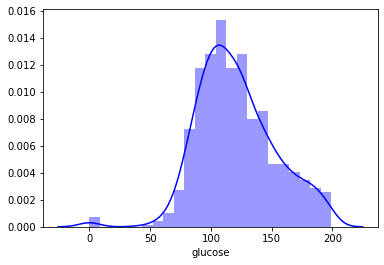

In [71]:
sns.distplot(diabete.glucose, color='blue')

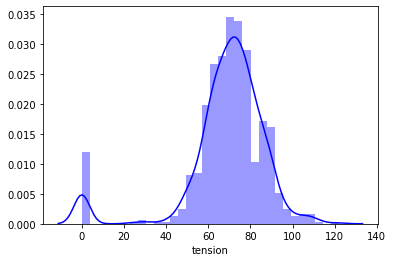

In [72]:
sns.distplot(diabete.tension, color='blue')

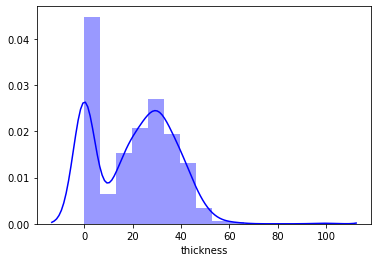

In [73]:
sns.distplot(diabete.thickness, color='blue')

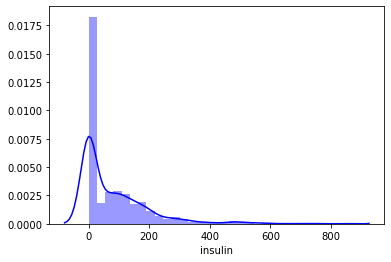

In [74]:
sns.distplot(diabete.insulin, color='blue')

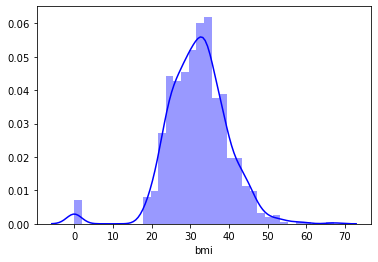

In [75]:
sns.distplot(diabete.bmi, color='blue')

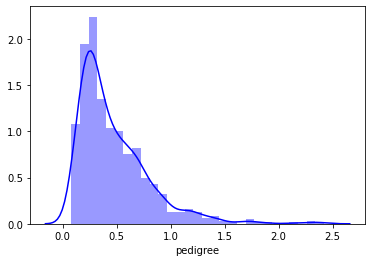

In [76]:
sns.distplot(diabete.pedigree, color='blue')

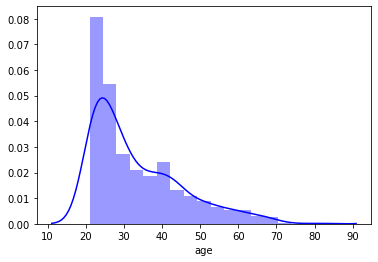

In [77]:
sns.distplot(diabete.age, color='blue')

Il est étrange de retrouver des valeurs à 0 pour : BMI, Insulin, thickness, glucose

Je vais passer les valeurs valant 0 à NaN pour mieux visualiser les vides

In [78]:
df_diabete = diabete.replace(0,np.nan)
df_diabete.n_pregnant = diabete.n_pregnant
df_diabete.pedigree = diabete.pedigree
df_diabete.diabete = diabete.diabete

In [79]:
df_diabete.count()

n_pregnant    768
glucose       763
tension       733
thickness     541
insulin       394
bmi           757
pedigree      768
age           768
diabete       768
dtype: int64

Nous allons remplir les valeurs NaN à l'aide de la méthode pad

In [80]:
df_diabete = df_diabete.fillna(method='pad')

In [81]:
df_diabete.count()

n_pregnant    768
glucose       768
tension       768
thickness     768
insulin       765
bmi           768
pedigree      768
age           768
diabete       768
dtype: int64

A priori les trois premiers cas était en NaN ce qui explique qu'il n'ai pas récupérer de valeurs, on s'adapte :

In [82]:
df_diabete = df_diabete.fillna(value = {'insulin':df_diabete.insulin.mean()})

In [83]:
df_diabete.count()

n_pregnant    768
glucose       768
tension       768
thickness     768
insulin       768
bmi           768
pedigree      768
age           768
diabete       768
dtype: int64

(array([16.,  7., 27., 39., 38., 58., 28., 41., 41., 39., 43., 42., 33.,
        27., 32., 32., 22., 29., 18., 13., 12., 18.,  3.,  7., 15., 11.,
         8.,  2.,  1., 14.,  6.,  2.,  0.,  1.,  2.,  1.,  1.,  4.,  1.,
         0.,  1.,  0.,  0.,  1.,  9.,  3.,  2.,  2.,  0.,  0.,  6.,  1.,
         0.,  0.,  2.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 14. ,  24.4,  34.8,  45.2,  55.6,  66. ,  76.4,  86.8,  97.2,
        107.6, 118. , 128.4, 138.8, 149.2, 159.6, 170. , 180.4, 190.8,
        201.2, 211.6, 222. , 232.4, 242.8, 253.2, 263.6, 274. , 284.4,
        294.8, 305.2, 315.6, 326. , 336.4, 346.8, 357.2, 367.6, 378. ,
        388.4, 398.8, 409.2, 419.6, 430. , 440.4, 450.8, 461.2, 471.6,
        482. , 492.4, 502.8, 513.2, 523.6, 534. , 544.4, 554.8, 565.2,
        575.6, 586. , 596.4, 606.8, 617.2, 627.6, 638. , 648.4, 658.8,
        669.2, 679.6, 690. , 700.4, 710.8, 72

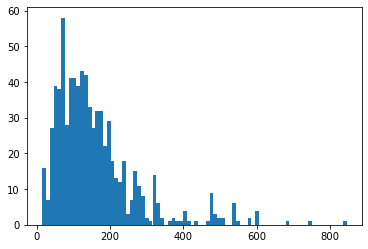

In [84]:
plt.hist(df_diabete.insulin, bins=80)

### Mise à l'échelle des données quantitatives

In [85]:
df_diabete['log_pedigree'] = np.log(df_diabete.pedigree+1)

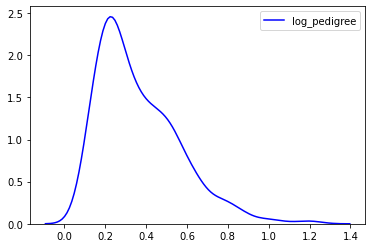

In [86]:
sns.kdeplot(df_diabete.log_pedigree, color='blue')

In [87]:
df_diabete = df_diabete.drop(['pedigree'], axis=1)

In [88]:
df_diabete.head()

,n_pregnant,glucose,tension,thickness,insulin,bmi,age,diabete,log_pedigree
0,6,148.0,72.0,35.0,157.332026,33.6,50,1,0.486738
1,1,85.0,66.0,29.0,157.332026,26.6,31,0,0.300845
2,8,183.0,64.0,29.0,157.332026,23.3,32,1,0.514021
3,1,89.0,66.0,23.0,94.000000,28.1,21,0,0.154436
4,0,137.0,40.0,35.0,168.000000,43.1,33,1,1.190279


### Préparation des jeux de test

In [89]:
df_diabete.diabete.value_counts() 

0    500
1    268
Name: diabete, dtype: int64

In [90]:
X = df_diabete.drop(['diabete'], axis=1)
y = df_diabete.diabete

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,shuffle=True)

In [92]:
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


In [93]:
print(X_train)
print(X_test)

     n_pregnant  glucose  tension  thickness  insulin   bmi  age  log_pedigree
88           15    136.0     70.0       32.0    110.0  37.1   43      0.142367
467           0     97.0     64.0       36.0    100.0  36.8   25      0.470004
550           1    116.0     70.0       28.0     67.0  27.4   21      0.185649
147           2    106.0     64.0       35.0    119.0  30.5   34      0.875469
481           0    123.0     88.0       37.0    328.0  35.2   29      0.179818
..          ...      ...      ...        ...      ...   ...  ...           ...
645           2    157.0     74.0       35.0    440.0  39.4   30      0.125751
715           7    187.0     50.0       33.0    392.0  33.9   34      0.602128
72           13    126.0     90.0       35.0    140.0  43.4   42      0.459322
235           4    171.0     72.0       28.0     45.0  43.6   26      0.391366
37            9    102.0     76.0       37.0    192.0  32.9   46      0.509825

[537 rows x 8 columns]
     n_pregnant  glucose  te

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [96]:
y_lr = lr.predict(X_test)

### Performances

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [98]:
print(confusion_matrix(y_test,y_lr))

[[130  16]
 [ 36  49]]


In [99]:
print(accuracy_score(y_test,y_lr))

0.7748917748917749


In [100]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       146
           1       0.75      0.58      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [101]:
probas = lr.predict_proba(X_test)

In [102]:
print(probas)

[[0.56020918 0.43979082]
 [0.84064043 0.15935957]
 [0.88632048 0.11367952]
 [0.93473289 0.06526711]
 [0.75772906 0.24227094]
 [0.69117471 0.30882529]
 [0.60460886 0.39539114]
 [0.89238265 0.10761735]
 [0.85629675 0.14370325]
 [0.7869807  0.2130193 ]
 [0.60756487 0.39243513]
 [0.91623396 0.08376604]
 [0.02087835 0.97912165]
 [0.21442941 0.78557059]
 [0.51773527 0.48226473]
 [0.1986249  0.8013751 ]
 [0.73435524 0.26564476]
 [0.66864507 0.33135493]
 [0.97186978 0.02813022]
 [0.87514129 0.12485871]
 [0.55709546 0.44290454]
 [0.87061866 0.12938134]
 [0.04437539 0.95562461]
 [0.76843235 0.23156765]
 [0.92395241 0.07604759]
 [0.64822229 0.35177771]
 [0.79747895 0.20252105]
 [0.25956574 0.74043426]
 [0.89456842 0.10543158]
 [0.56294815 0.43705185]
 [0.4895218  0.5104782 ]
 [0.91504953 0.08495047]
 [0.94319084 0.05680916]
 [0.27509527 0.72490473]
 [0.88221918 0.11778082]
 [0.27453163 0.72546837]
 [0.91536338 0.08463662]
 [0.80735213 0.19264787]
 [0.89270886 0.10729114]
 [0.37138833 0.62861167]


In [103]:
dfprobas = pd.DataFrame(probas,columns=['proba_0','proba_1'])
dfprobas['y'] = np.array(y_test)

In [104]:
print(dfprobas)

      proba_0   proba_1  y
0    0.560209  0.439791  0
1    0.840640  0.159360  0
2    0.886320  0.113680  0
3    0.934733  0.065267  0
4    0.757729  0.242271  0
..        ...       ... ..
226  0.887068  0.112932  0
227  0.894815  0.105185  0
228  0.954206  0.045794  0
229  0.207654  0.792346  1
230  0.683996  0.316004  1

[231 rows x 3 columns]


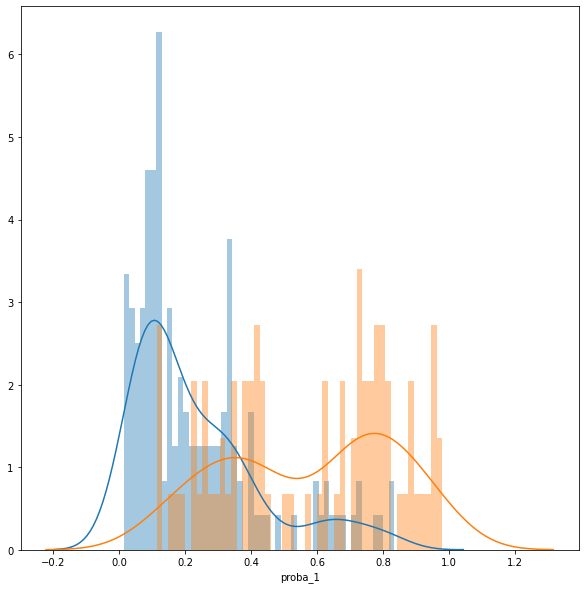

In [105]:
plt.figure(figsize=(10,10))
sns.distplot(1-dfprobas.proba_0[dfprobas.y==0], bins=50)
sns.distplot(dfprobas.proba_1[dfprobas.y==1], bins=50)

In [106]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.8617244157937147


Text(0.5, 0, 'False Positive Rate')

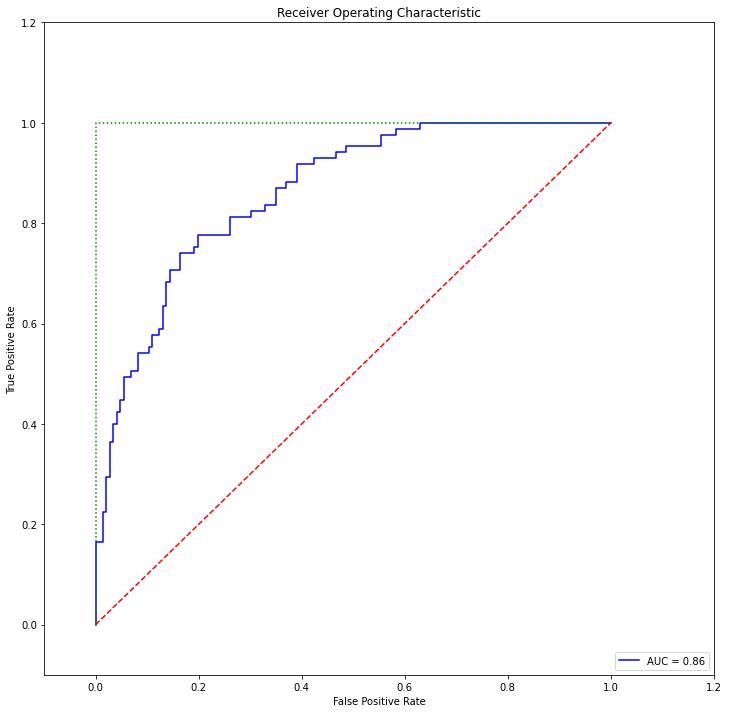

In [107]:
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.plot([0,0,1],[0,1,1],'g:')     # meilleure courbe
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Ajustement des hyperparamètres (Random Forests)

In [108]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [109]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.79      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



In [110]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[132  14]
 [ 33  52]]


In [111]:
rf1 = ensemble.RandomForestClassifier(n_estimators=10, min_samples_leaf=10, max_features=3)
rf1.fit(X_train, y_train)
y_rf1 = rf.predict(X_test)
print(classification_report(y_test, y_rf1))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.79      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass param_name=n_estimators, param_range=[  1  31  61  91 121 151 181 211 241 271] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


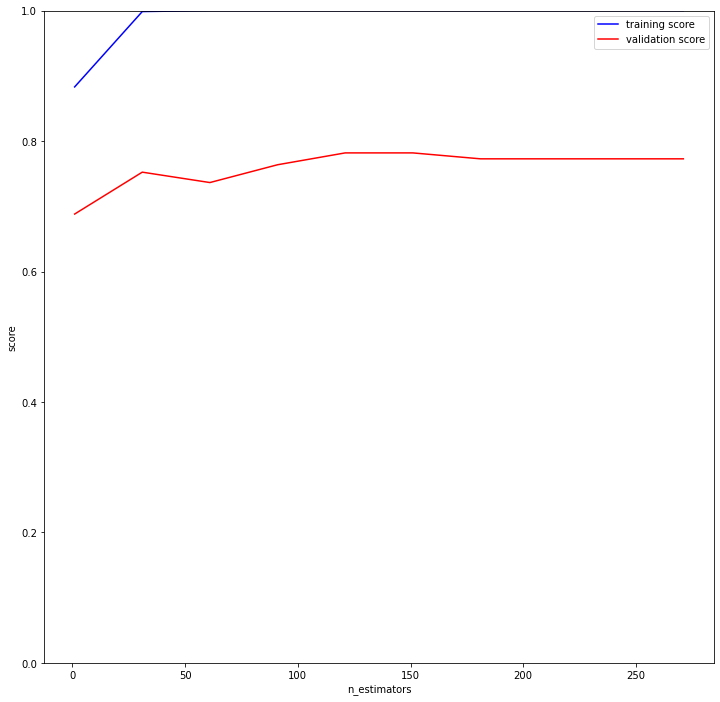

In [112]:
from sklearn.model_selection import validation_curve
params = np.arange(1, 300,step=30)
train_score, val_score = validation_curve(rf, X, y, 'n_estimators', params, cv=7)
plt.figure(figsize=(12,12))
plt.plot(params, np.median(train_score, 1), color='blue', label='training score')
plt.plot(params, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score');

In [113]:
from sklearn import model_selection

In [114]:
param_grid = {
              'n_estimators': [10, 100, 500],
              'min_samples_leaf': [1, 20, 50]
             }
estimator = ensemble.RandomForestClassifier()
rf_gs = model_selection.GridSearchCV(estimator, param_grid)

In [115]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 20, 50],
                         'n_estimators': [10, 100, 500]})

In [116]:
print(rf_gs.best_params_)

{'min_samples_leaf': 1, 'n_estimators': 500}


In [117]:
rf2 = rf_gs.best_estimator_

In [118]:
y_rf2 = rf2.predict(X_test)

In [119]:
print(classification_report(y_test, y_rf2))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.60      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



### Importance des caractéristiques

In [120]:
importances = rf2.feature_importances_
indices = np.argsort(importances)

Text(0.5, 1.0, 'Importance des caracteristiques')

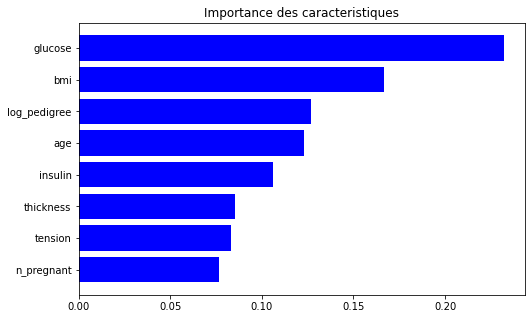

In [121]:
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.title('Importance des caracteristiques')

In [122]:
import xgboost as XGB
xgb  = XGB.XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_xgb)
print(cm)
print(classification_report(y_test, y_xgb))

[[123  23]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.71      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

